# Import Library

In [1]:
! pip install missingno

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import missingno as msno
import warnings
warnings.filterwarnings('ignore')
import os

# Import Data

In [3]:
df = pd.read_csv('D:\MyProject\Project Churn Prediction Teleco\WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Drop Column not Important

In [6]:
# Drop column customerID because not important
df = df.drop(['customerID'], axis=1)

In [7]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
# changing 'TotalCharges' object data type to float
# changing 'SeniorCitizen' int data type to object

df['TotalCharges'] = df['TotalCharges'].apply(pd.to_numeric, errors='coerce')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


# EDA

### Checking missing value

In [10]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

<Axes: >

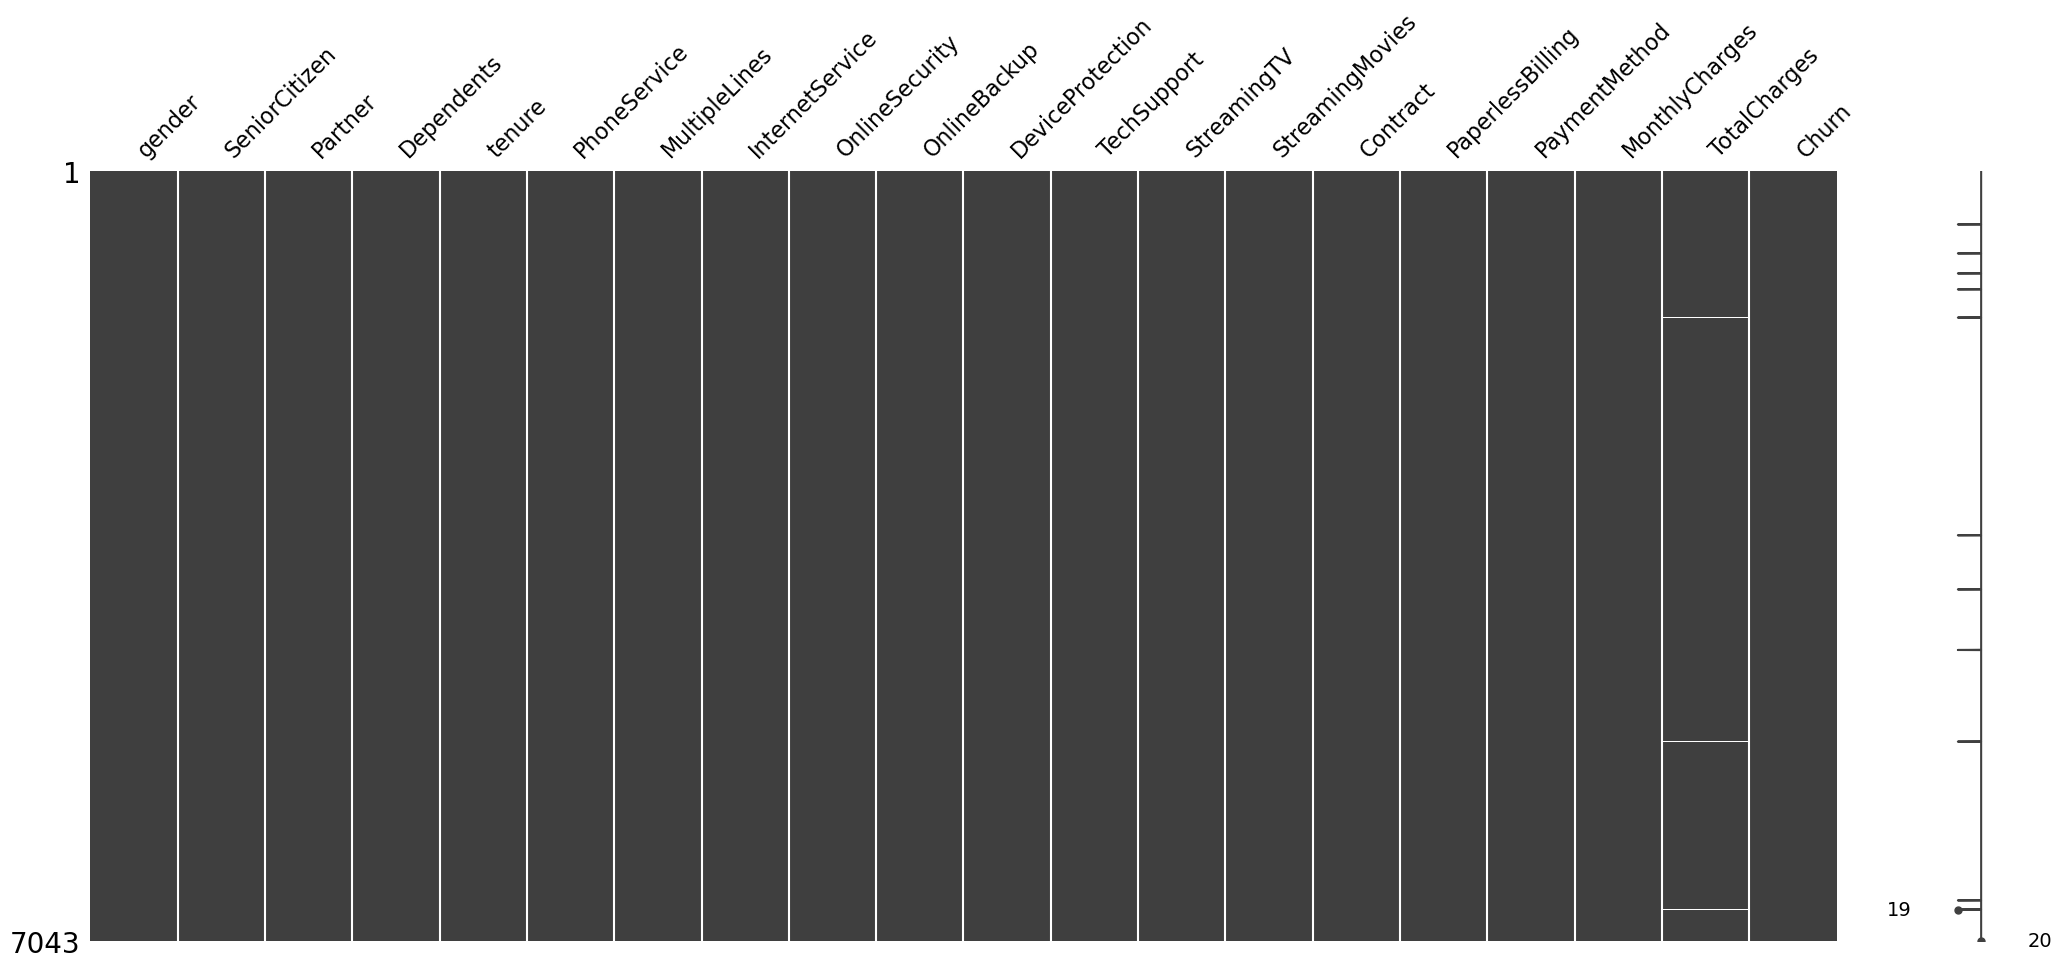

In [11]:
msno.matrix(df)

In [12]:
# after change datatype 'TotalCharges' from object to float, we have some missing value. Let's handling missing value with replace nan

df['TotalCharges'] = df['TotalCharges'].fillna(method="ffill")

In [13]:
# check more missing value

df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Get info about datatype of each column

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


**We have 20 columns and 7043 entries data**

- customerID: customer ID
- gender: customer gender (Male/Female)
- seniorCitizen: whether the customer is a senior citizen (1/0)
- partner: whether the customer has a partner (Yes/No)
- dependents: whether the customer has dependents (Yes/No)
- tenure: number of months the customer has stayed with the company
- phoneService: whether the customer has phone service (Yes/No)
- multipleLines: whether the customer has multiple lines (Yes/No/No phone service)
- internetService: customer’s internet service provider (DSL/Fiber optic/No)
- onlineSecurity: whether the customer has online security (Yes/No/No internet service)
- onlineBackup: whether the customer has online backup (Yes/No/No internet service)
- deviceProtection: whether the customer has device protection (Yes/No/No internet service)
- techSupport: whether the customer has tech support (Yes/No/No internet service)
- streamingTV: whether the customer has streaming TV (Yes/No/No internet service)
- streamingMovies: whether the customer has streaming movies (Yes/No/No internet service)
- contract: the contract term of the customer (Month-to-month/One year/Two year)
- paperlessBilling: whether the customer has paperless billing (Yes/No)
- paymentMethod: the customer’s payment method (Electronic check/Mailed check/Bank transfer (automatic)/Credit card (automatic))
- monthlyCharges: the amount charged to the customer monthly
- totalCharges: the total amount charged to the customer
- churn: whether the customer churned (Yes/No)

## Single Visualization Variable

### Identify target data churn and all each single variable column

#### Churn

In [15]:
print(df['Churn'].value_counts())

Churn
No     5174
Yes    1869
Name: count, dtype: int64


**There are 5709 No Churn labels and 1869 Yes Churn labels**

In [16]:
# pie plott

# make function for category churn 

def Groupby_OneCol_comp_plot(df, col, plt_style = 'seaborn-ticks', color_palette = "husl"):
    gr=pd.DataFrame()
    gr['{} No'.format(col)] = df.groupby(col).size()
    gr['{} Ratio'.format(col)] = np.round(gr['{} No'.format(col)].divide(gr['{} No'.format(col)].sum())*100,0)
    fig = plt.figure(figsize= (20,5))
    plt.style.use(plt_style)
    sns.set_palette(sns.color_palette(color_palette))
    
    fig.add_subplot(122)
    plt.axis('off')
    gr.loc[:,'{} Ratio'.format(col)].plot(kind= 'pie',
                                     autopct='%1.1f%%',shadow=False,
                                     title='{} Ratio'.format(col), legend=False, labels=None);
    sns.despine(top=True, right=True, left=True, bottom=False);

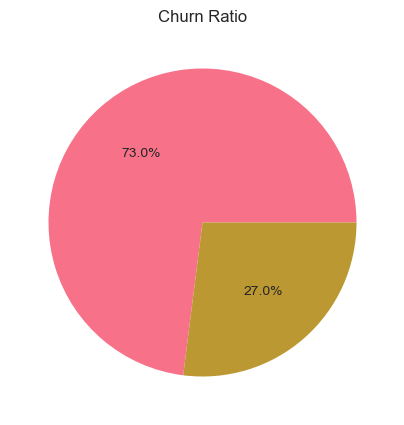

In [17]:
# call function for pie plott churn

Groupby_OneCol_comp_plot(df, 'Churn')

#### Categorical variables

gender
Male      3555
Female    3488
Name: count, dtype: int64


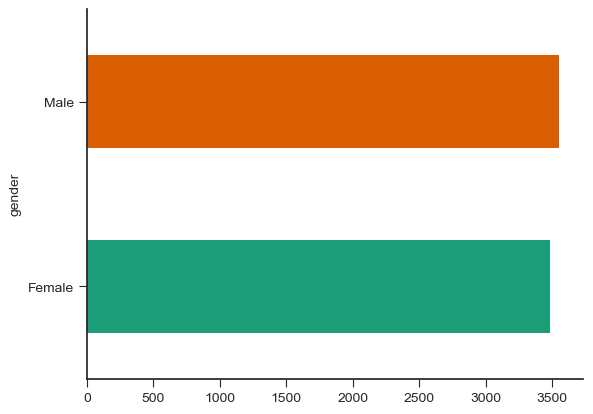

In [18]:
# @title gender

print(df['gender'].value_counts())
df.groupby('gender').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64


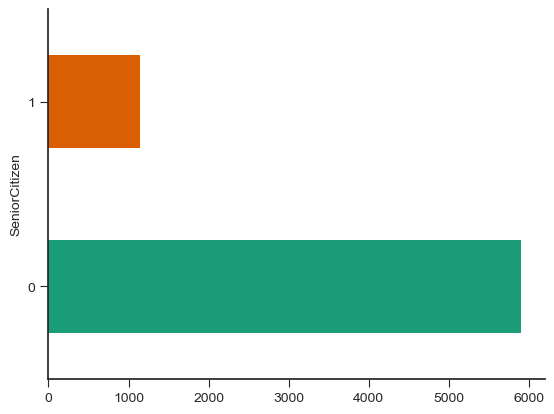

In [19]:
# @title senior citizen

print(df['SeniorCitizen'].value_counts())
df.groupby('SeniorCitizen').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

Partner
No     3641
Yes    3402
Name: count, dtype: int64


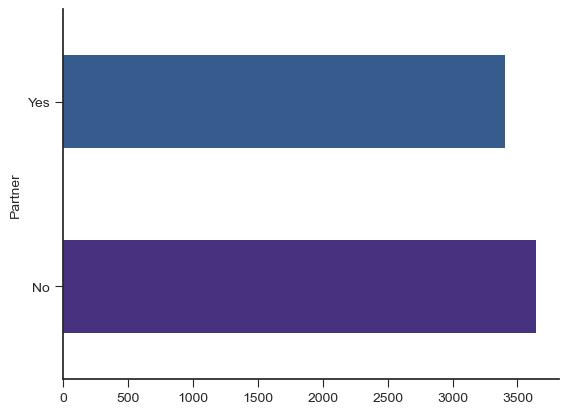

In [20]:
# @title partner

print(df['Partner'].value_counts())
df.groupby('Partner').size().plot(kind='barh', color=sns.palettes.mpl_palette('viridis'))
plt.gca().spines[['top', 'right',]].set_visible(False)

Dependents
No     4933
Yes    2110
Name: count, dtype: int64


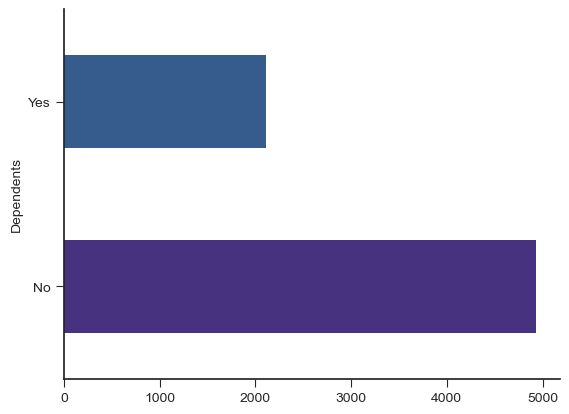

In [21]:
# @title dependents

print(df['Dependents'].value_counts())
df.groupby('Dependents').size().plot(kind='barh', color=sns.palettes.mpl_palette('viridis'))
plt.gca().spines[['top', 'right',]].set_visible(False)

PhoneService
Yes    6361
No      682
Name: count, dtype: int64


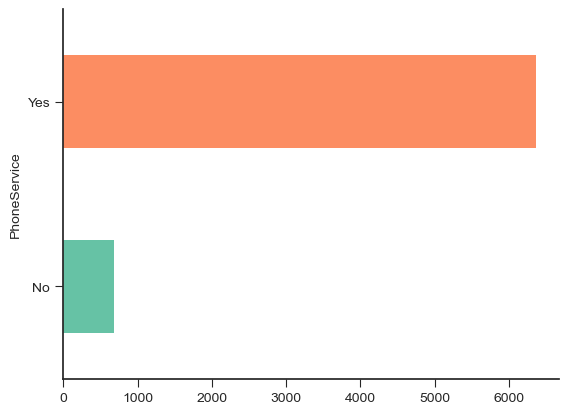

In [22]:
# @title phoneService

print(df['PhoneService'].value_counts())
df.groupby('PhoneService').size().plot(kind='barh', color=sns.palettes.mpl_palette('Set2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64


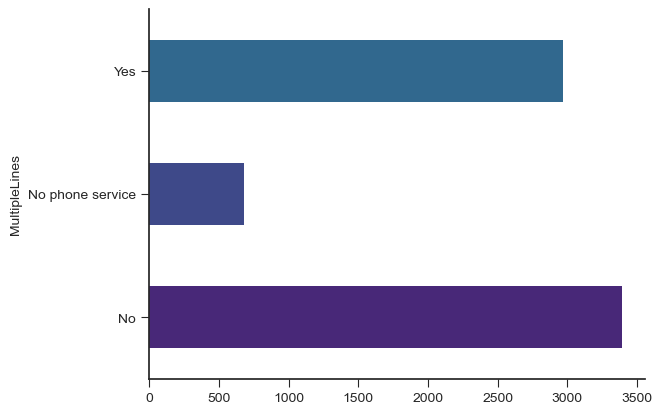

In [23]:
# @title MultipleLines

print(df['MultipleLines'].value_counts())
df.groupby('MultipleLines').size().plot(kind='barh', color=sns.palettes.mpl_palette('viridis', 8))
plt.gca().spines[['top', 'right',]].set_visible(False)

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64


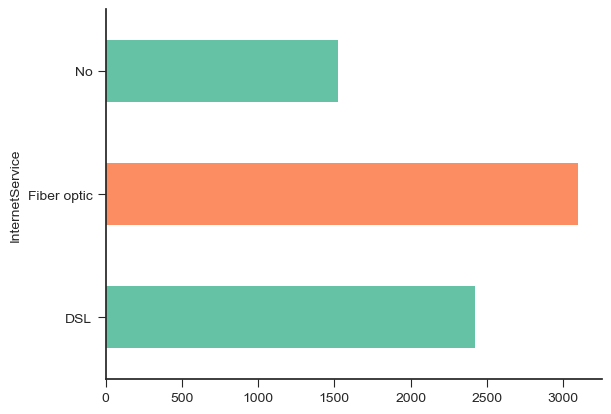

In [24]:
# @title InternetService

print(df['InternetService'].value_counts())
df.groupby('InternetService').size().plot(kind='barh', color=sns.palettes.mpl_palette('Set2', 2))
plt.gca().spines[['top', 'right',]].set_visible(False)

OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64


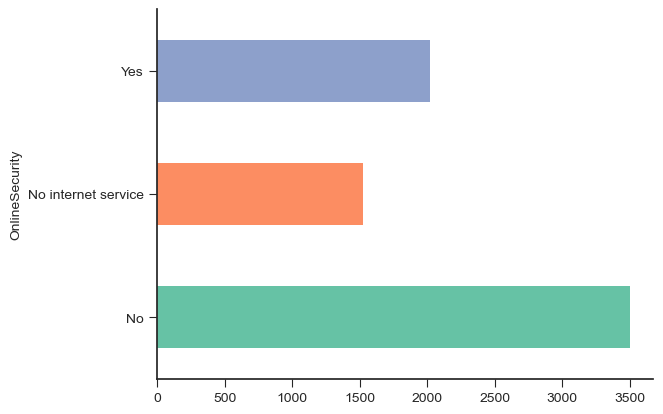

In [25]:
# @title OnlineSecurity

print(df['OnlineSecurity'].value_counts())
df.groupby('OnlineSecurity').size().plot(kind='barh', color=sns.palettes.mpl_palette('Set2',3))
plt.gca().spines[['top', 'right',]].set_visible(False)

OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64


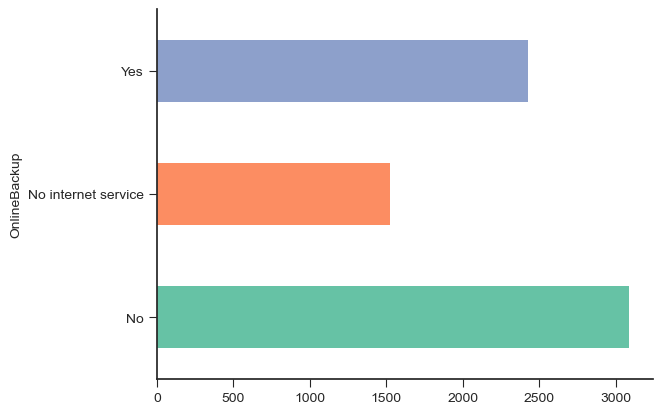

In [26]:
# @title OnlineBackup

print(df['OnlineBackup'].value_counts())
df.groupby('OnlineBackup').size().plot(kind='barh', color=sns.palettes.mpl_palette('Set2', 4))
plt.gca().spines[['top', 'right',]].set_visible(False)

DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64


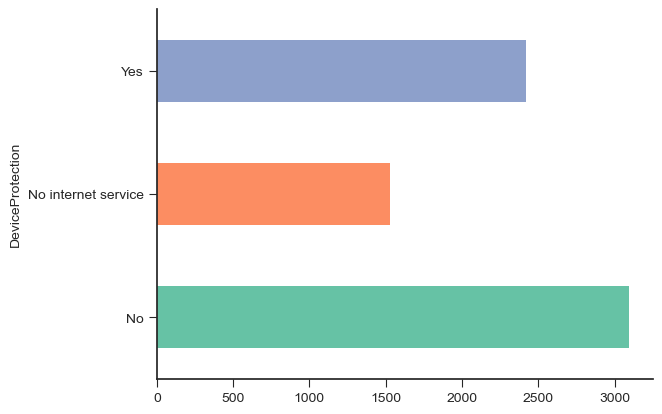

In [27]:
# @title DeviceProtection

print(df['DeviceProtection'].value_counts())
df.groupby('DeviceProtection').size().plot(kind='barh', color=sns.palettes.mpl_palette('Set2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

TechSupport
No                     3473
Yes                    2044
No internet service    1526
Name: count, dtype: int64


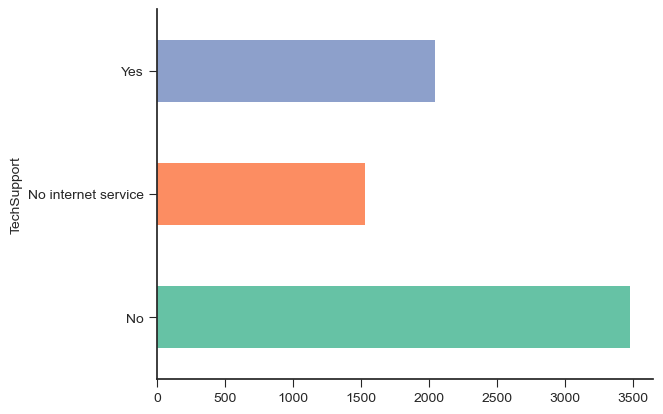

In [28]:
# @title TechSupport

print(df['TechSupport'].value_counts())
df.groupby('TechSupport').size().plot(kind='barh', color=sns.palettes.mpl_palette('Set2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

StreamingTV
No                     2810
Yes                    2707
No internet service    1526
Name: count, dtype: int64


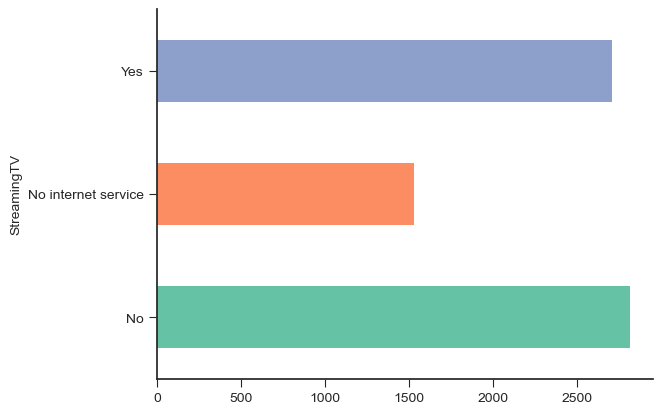

In [29]:
# @title StreamingTV

print(df['StreamingTV'].value_counts())
df.groupby('StreamingTV').size().plot(kind='barh', color=sns.palettes.mpl_palette('Set2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

StreamingMovies
No                     2785
Yes                    2732
No internet service    1526
Name: count, dtype: int64


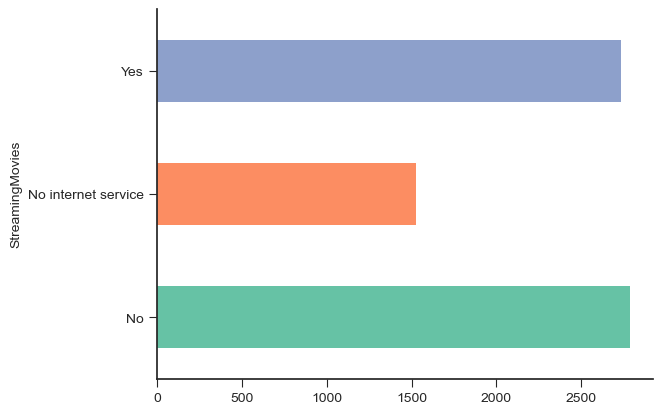

In [30]:
# @title StreamingMovies

print(df['StreamingMovies'].value_counts())
df.groupby('StreamingMovies').size().plot(kind='barh', color=sns.palettes.mpl_palette('Set2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64


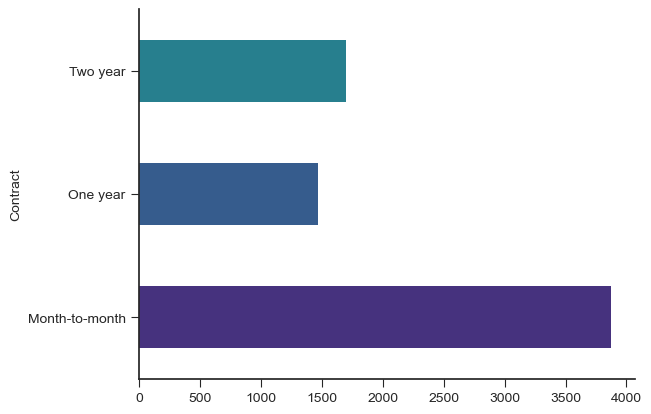

In [31]:
# @title Contract

print(df['Contract'].value_counts())
df.groupby('Contract').size().plot(kind='barh', color=sns.palettes.mpl_palette('viridis'))
plt.gca().spines[['top', 'right',]].set_visible(False)

PaperlessBilling
Yes    4171
No     2872
Name: count, dtype: int64


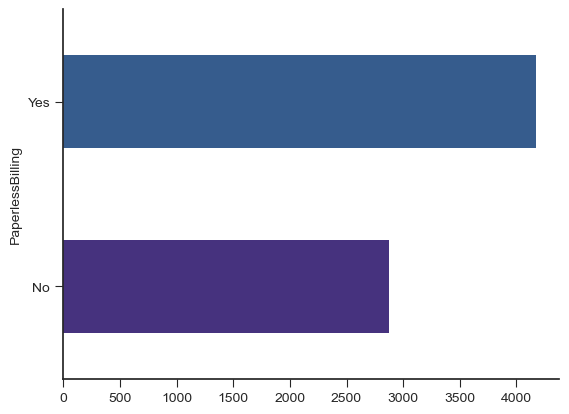

In [32]:
# @title PaperlessBilling

print(df['PaperlessBilling'].value_counts())
df.groupby('PaperlessBilling').size().plot(kind='barh', color=sns.palettes.mpl_palette('viridis'))
plt.gca().spines[['top', 'right',]].set_visible(False)

PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64


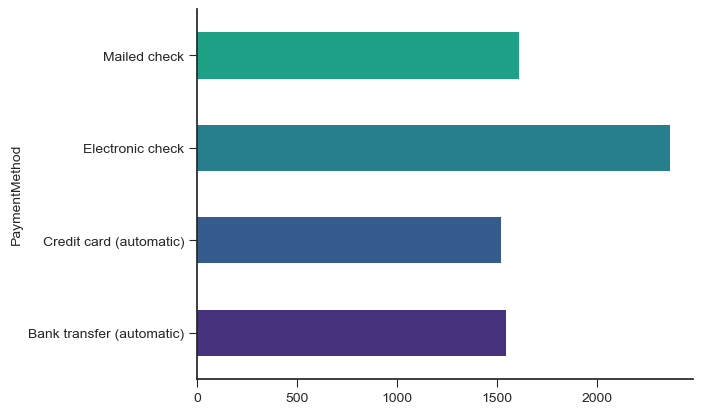

In [33]:
# @title PaymentMethod

print(df['PaymentMethod'].value_counts())
df.groupby('PaymentMethod').size().plot(kind='barh', color=sns.palettes.mpl_palette('viridis'))
plt.gca().spines[['top', 'right',]].set_visible(False)

#### Numerical variables

In [69]:
df['MonthlyCharges'].describe()

count    7043.000000
mean        0.462803
std         0.299403
min         0.000000
25%         0.171642
50%         0.518408
75%         0.712438
max         1.000000
Name: MonthlyCharges, dtype: float64

tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.959570
dtype: float64


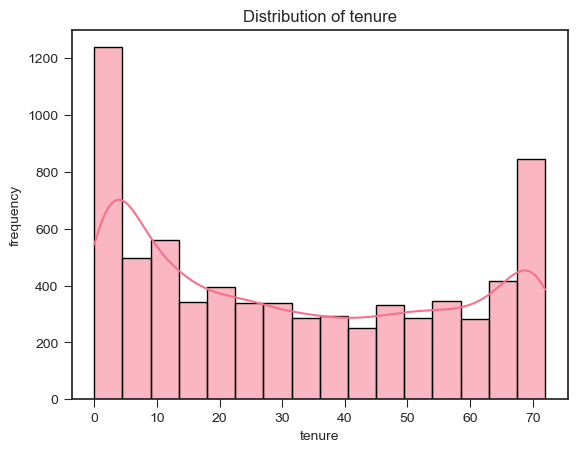

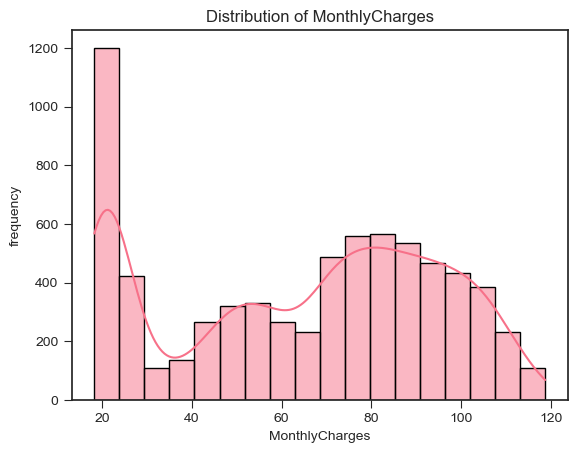

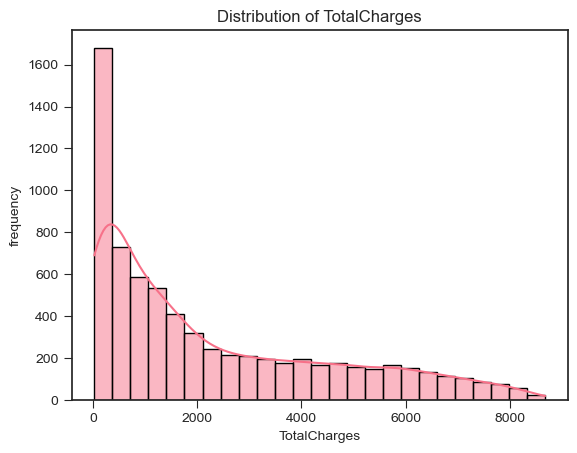

In [34]:
#Distribution of Numerical Columns
n_columns = ['tenure','MonthlyCharges','TotalCharges']
skew_df = df[n_columns].skew()
print(skew_df)

for col in n_columns:   
    sns.histplot(df[col],kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('frequency')
    plt.show()

### Between Relation variable

gender
Female    939
Male      930
Name: count, dtype: int64


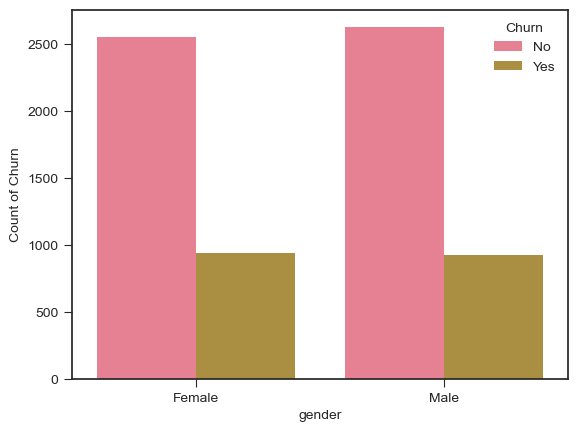

In [35]:
#count of Churn & non Churn customer wrt Gender
chur_gender = df[df['Churn'] == 'Yes']['gender'].value_counts()
print(chur_gender)
sns.countplot(x='gender',hue='Churn',data=df)
plt.xlabel('gender')
plt.ylabel('Count of Churn')
plt.show()

Contract
Month-to-month    1655
One year           166
Two year            48
Name: count, dtype: int64


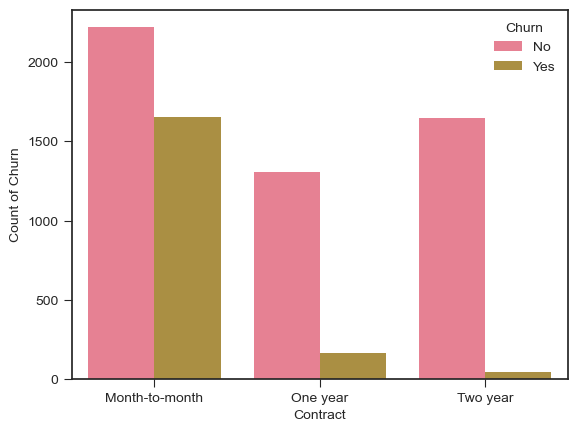

In [36]:
#count of Churn & non Churn customer wrt Contract
chur_contract = df[df['Churn'] == 'Yes']['Contract'].value_counts()
print(chur_contract)
sns.countplot(x='Contract',hue='Churn',data=df)
plt.xlabel('Contract')
plt.ylabel('Count of Churn')
plt.show()

InternetService
Fiber optic    1297
DSL             459
No              113
Name: count, dtype: int64


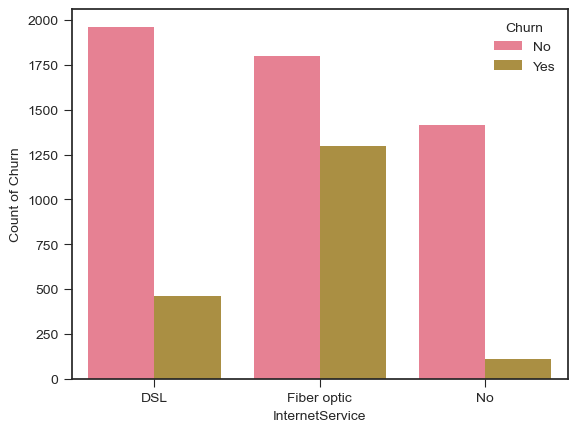

In [37]:
#count of Churn & non Churn customer wrt InternetService
chur_internet = df[df['Churn'] == 'Yes']['InternetService'].value_counts()
print(chur_internet)
sns.countplot(x='InternetService',hue='Churn',data=df)
plt.xlabel('InternetService')
plt.ylabel('Count of Churn')
plt.show()